In [ ]:
#!/usr/bin/env python
# coding: utf-8

In[372]:

In [2]:
import os
import glob
import pandas as pd
from tqdm.auto import tqdm
import time
import numpy as np
import numpy.ma as ma

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [5]:
from tensorflow.keras.layers import Dense, Activation, Input, GRU, SimpleRNN, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import GlorotUniform
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [6]:
train_path = 'C:\\Users\\Steven\\Desktop\\New folder\\train.csv'
test_path = 'C:\\Users\\Steven\\Desktop\\New folder\\validation.csv'
train = pd.read_csv(train_path)
#train.drop([0], axis=1)
test = pd.read_csv(test_path)

In [7]:
train['num_risk_deaths'] =  train['risk_deaths'].apply(lambda x: 0 if x == 'low' else 1)
train = train.drop(['deaths','confirmed_cases','risk_cases', 'state', 'county_name',
           'confirmed_cases_per1000','deaths_per1000', 'risk_deaths', 'county_fips_code'], axis=1)

In [8]:
test['num_risk_deaths'] =  test['risk_deaths'].apply(lambda x: 0 if x == 'low' else 1)
test = test.drop(['deaths','confirmed_cases','risk_cases', 'state', 'county_name',
           'confirmed_cases_per1000','deaths_per1000', 'risk_deaths', 'county_fips_code'], axis=1)

In [9]:
np_train = train.to_numpy()
np_test = test.to_numpy()

In [10]:
X_train = np_train[:,:-1]
y_train = np_train[:, -1]
X_test = np_test[:,:-1]
y_test = np_test[:, -1]

In[4]:

In [11]:
X_train.shape[1]

20

In[357]:

In [23]:
input_all = Input(shape=(X_train.shape[1],))
x = Dense(units=32, activation='relu',kernel_initializer='random_normal')(input_all)
x = Dense(units=64, activation='relu',kernel_initializer='random_normal')(x)
x = Dense(units=128, activation='relu',kernel_initializer='random_normal')(x)
x = Dense(units=256, activation='relu',kernel_initializer='random_normal')(x)
x = Dense(units=128, activation='relu',kernel_initializer='random_normal')(x)
x = Dense(units=64, activation='relu',kernel_initializer='random_normal')(x)
x = Dense(units=32, activation='relu',kernel_initializer='random_normal')(x)
prediction = Dense(units=1, activation='sigmoid')(x)

In [24]:
model = Model(inputs=input_all, outputs=prediction)

In [25]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='bce',
              metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                672       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256

In [27]:
model = None

input_all = Input(shape=(X_train.shape[1],))
x = Dense(units=32, activation='relu',
          kernel_initializer='glorot_uniform')(input_all)
x = Dense(units=64, activation='relu',kernel_initializer='glorot_uniform')(x)
nx = Dense(units=128, activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(units=256, activation='relu',kernel_initializer='glorot_uniform')(x)
prediction = Dense(units=1, activation='sigmoid')(x)

model = Model(inputs=input_all, outputs=prediction)

model.compile(optimizer=Adam(learning_rate=0.00001,
                             beta_1=0.8,
                             beta_2=0.99,
                             epsilon=1e-06,),
              loss='bce',
              metrics=['accuracy'])


class_weight = [5,  50]

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=120,  batch_size=50, 
                    class_weight=class_weight, 
                    verbose=False)
yhat = model.predict(X_train)
print(min(yhat), max(yhat), np.mean(yhat))
yhat = model.predict(X_test)
print(min(yhat), max(yhat), np.mean(yhat))

[2.3090032e-09] [0.9999155] 0.2900671
[4.938689e-05] [0.9958776] 0.29791468


In [16]:
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12.8,4.8))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
def plot_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12.8,4.8))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.show()

In [17]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plot_history(history)
yhat = model.predict(X_train).round()
print('Train:', accuracy_score(y_train, yhat)*100)
yhat = model.predict(X_test).round()
print('Validation:', accuracy_score(y_test, yhat)*100)

In [ ]:
from sklearn.metrics import recall_score
yhat = (model.predict(X_test)).round()
print(recall_score(y_test, yhat, pos_label=0))
print(recall_score(y_test, yhat, pos_label=1))

In [ ]:
yhat = (model.predict(X_test) + 0.30).round()
print(recall_score(y_test, yhat, pos_label=0))
print(recall_score(y_test, yhat, pos_label=1))

In[414]:

[5.5901153e-24] [1.] 0.42295647
[2.3554828e-07] [0.9999746] 0.44828597


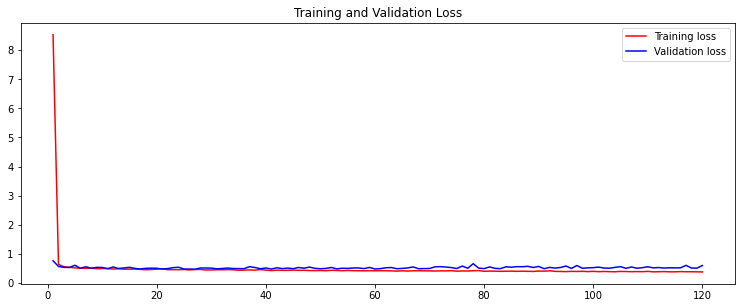

Train: 76.46224742998936
Validation: 68.370607028754


In [29]:
model = None
seed(1)
tf.random.set_seed(2)
from tensorflow.python.keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

input_all = Input(shape=(X_train.shape[1],))
x = Dense(units=32, activation='relu',
          kernel_initializer='glorot_uniform')(input_all)
x = Dense(units=64, activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(units=128, activation='relu',kernel_initializer='glorot_uniform')(x)
x = Dense(units=256, activation='relu',kernel_initializer='glorot_uniform')(x)
prediction = Dense(units=1, activation='sigmoid')(x)

model = Model(inputs=input_all, outputs=prediction)

model.compile(optimizer=Adam(learning_rate=0.0001,
                             beta_1=0.8,
                             beta_2=0.99,
                             epsilon=1e-07,),
              loss='bce',
              metrics=['accuracy'])


class_weight = [15,  50]
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=120,  batch_size=50, 
                    class_weight=class_weight, 
                    verbose=False)
yhat = model.predict(X_train)
print(min(yhat), max(yhat), np.mean(yhat))
yhat = model.predict(X_test)
print(min(yhat), max(yhat), np.mean(yhat))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plot_history(history)
yhat = model.predict(X_train).round()
print('Train:', accuracy_score(y_train, yhat)*100)
yhat = model.predict(X_test).round()
print('Validation:', accuracy_score(y_test, yhat)*100)

In [30]:
from sklearn.metrics import recall_score
yhat = (model.predict(X_test)).round()
print(recall_score(y_test, yhat, pos_label=0))
print(recall_score(y_test, yhat, pos_label=1))

0.6607929515418502
0.7441860465116279


In [31]:
yhat = (model.predict(X_test) + 0.075).round()
print(recall_score(y_test, yhat, pos_label=0))
print(recall_score(y_test, yhat, pos_label=1))

0.5594713656387665
0.8488372093023255


In[416]:

In [46]:
yhat = (model.predict(X_train))
yhat = yhat.round()
preds = []
for ele in yhat:
    if ele == 1:
        preds.append("high")
    else:
        preds.append("low")

In [48]:
for p in preds:
    print('\'' + p +  '\'' + ',')

'high',
'high',
'high',
'low',
'low',
'low',
'low',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'high',
'low',
'high',
'low',
'high',
'high',
'low',
'low',
'high',
'high',
'low',
'high',
'high',
'low',
'low',
'low',
'low',
'low',
'high',
'low',
'high',
'low',
'low',
'low',
'high',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'high',
'high',
'low',
'low',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'high',
'low',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'high',
'low',
'low',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'high',
'low',
'high',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
'low',
